In [1]:
import pandas as pd
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.linear_model import LinearRegression

/Users/induwarag/DataCrunch/AgroChill/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
weather_df = pd.read_csv("./Datasets/WeatherData/train_data.csv")
price_df = pd.read_csv("./Datasets/PriceData/train_data.csv")

 # Parse dates
price_df['Date'] = pd.to_datetime(price_df['Date'])
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Mergre the two datasets on the date and region columns
weather_agg = weather_df.groupby(['Region', 'Date']).mean().reset_index()
full_df = pd.merge(price_df, weather_agg, on=['Region', 'Date'], how='left')

full_df

,Date,Region,Commodity,Price per Unit (Silver Drachma/kg),Type,Temperature (K),Rainfall (mm),Humidity (%),Crop Yield Impact Score
0,2040-01-01,Mystic Falls,Plantain,296.37,Fruit,307.55,474.5,61.3,1.89
1,2040-01-01,Olympus,Loquat,394.21,Fruit,301.35,106.6,53.6,1.74
2,2040-01-01,Metropolis,Loquat,308.13,Fruit,306.15,266.3,93.9,2.18
3,2040-01-01,Arcadia,Loquat,460.81,Fruit,304.15,222.2,81.0,1.68
4,2040-01-01,Elysium,Loquat,85.58,Fruit,304.85,492.1,61.7,1.89
...,...,...,...,...,...,...,...,...,...
181725,2043-06-30,Shangri-La,Butternut Squash,189.08,Vegetable,296.55,427.5,54.5,1.91
181726,2043-06-30,Asgard,Sweet Potato,387.87,Vegetable,304.95,44.7,71.7,1.52
181727,2043-06-30,Rivendell,Butternut Squash,320.00,Vegetable,306.05,281.7,83.4,0.61
181728,2043-06-30,Winterfell,Butternut Squash,360.21,Vegetable,297.85,20.0,92.2,0.68


In [3]:
full_df.dropna()

,Date,Region,Commodity,Price per Unit (Silver Drachma/kg),Type,Temperature (K),Rainfall (mm),Humidity (%),Crop Yield Impact Score
0,2040-01-01,Mystic Falls,Plantain,296.37,Fruit,307.55,474.5,61.3,1.89
1,2040-01-01,Olympus,Loquat,394.21,Fruit,301.35,106.6,53.6,1.74
2,2040-01-01,Metropolis,Loquat,308.13,Fruit,306.15,266.3,93.9,2.18
3,2040-01-01,Arcadia,Loquat,460.81,Fruit,304.15,222.2,81.0,1.68
4,2040-01-01,Elysium,Loquat,85.58,Fruit,304.85,492.1,61.7,1.89
...,...,...,...,...,...,...,...,...,...
181725,2043-06-30,Shangri-La,Butternut Squash,189.08,Vegetable,296.55,427.5,54.5,1.91
181726,2043-06-30,Asgard,Sweet Potato,387.87,Vegetable,304.95,44.7,71.7,1.52
181727,2043-06-30,Rivendell,Butternut Squash,320.00,Vegetable,306.05,281.7,83.4,0.61
181728,2043-06-30,Winterfell,Butternut Squash,360.21,Vegetable,297.85,20.0,92.2,0.68


In [4]:
# Remove duplicates
full_df = full_df.drop_duplicates(subset=['Region', 'Date','Commodity'])
full_df

,Date,Region,Commodity,Price per Unit (Silver Drachma/kg),Type,Temperature (K),Rainfall (mm),Humidity (%),Crop Yield Impact Score
0,2040-01-01,Mystic Falls,Plantain,296.37,Fruit,307.55,474.5,61.3,1.89
1,2040-01-01,Olympus,Loquat,394.21,Fruit,301.35,106.6,53.6,1.74
2,2040-01-01,Metropolis,Loquat,308.13,Fruit,306.15,266.3,93.9,2.18
3,2040-01-01,Arcadia,Loquat,460.81,Fruit,304.15,222.2,81.0,1.68
4,2040-01-01,Elysium,Loquat,85.58,Fruit,304.85,492.1,61.7,1.89
...,...,...,...,...,...,...,...,...,...
181725,2043-06-30,Shangri-La,Butternut Squash,189.08,Vegetable,296.55,427.5,54.5,1.91
181726,2043-06-30,Asgard,Sweet Potato,387.87,Vegetable,304.95,44.7,71.7,1.52
181727,2043-06-30,Rivendell,Butternut Squash,320.00,Vegetable,306.05,281.7,83.4,0.61
181728,2043-06-30,Winterfell,Butternut Squash,360.21,Vegetable,297.85,20.0,92.2,0.68


In [5]:
full_df['RoundedDate'] = pd.to_datetime(full_df['Date']).dt.to_period('W').apply(lambda r: r.start_time)
# Exclude non-numeric columns before applying the mean function
agg_df = full_df.groupby(['Region', 'Commodity', 'RoundedDate']).agg(
    {col: 'mean' for col in full_df.select_dtypes(include='number').columns}
).reset_index()

def ensure_weekly_continuity(group):
    
    full_range = pd.date_range(start=group['RoundedDate'].min(),
                               end=group['RoundedDate'].max(),
                               freq='7D')
    return group.set_index('RoundedDate').reindex(full_range).rename_axis('RoundedDate').reset_index()

fixed_df = agg_df.groupby(['Region', 'Commodity']).apply(ensure_weekly_continuity).reset_index(drop=True)
fixed_df

/var/folders/n9/mmqk74cn5jn_6_4g79lmp2y00000gp/T/ipykernel_63141/1263884646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['RoundedDate'] = pd.to_datetime(full_df['Date']).dt.to_period('W').apply(lambda r: r.start_time)
/var/folders/n9/mmqk74cn5jn_6_4g79lmp2y00000gp/T/ipykernel_63141/1263884646.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fixed_df = agg_df.groupby(['Region', 'Commodity']).apply(ensure_weekly_continuity).reset_index(drop

,RoundedDate,Region,Commodity,Price per Unit (Silver Drachma/kg),Temperature (K),Rainfall (mm),Humidity (%),Crop Yield Impact Score
0,2040-01-02,Arcadia,Amaranth Leaves,283.89,304.150000,222.200000,81.000000,1.680000
1,2040-01-09,Arcadia,Amaranth Leaves,278.76,294.650000,173.100000,60.000000,2.100000
2,2040-01-16,Arcadia,Amaranth Leaves,98.04,293.950000,276.000000,81.800000,0.760000
3,2040-01-23,Arcadia,Amaranth Leaves,489.30,306.950000,444.600000,95.400000,1.030000
4,2040-01-30,Arcadia,Amaranth Leaves,61.76,300.450000,358.300000,52.400000,2.080000
...,...,...,...,...,...,...,...,...
168775,2043-05-25,Zion,Yam,295.96,302.550000,150.900000,50.600000,0.750000
168776,2043-06-01,Zion,Yam,517.03,309.583333,461.166667,52.433333,1.743333
168777,2043-06-08,Zion,Yam,412.40,310.050000,166.900000,71.100000,0.960000
168778,2043-06-15,Zion,Yam,135.68,307.750000,98.000000,73.800000,1.200000


In [6]:
# Get the data only for Arcadia Region and the Feijoa commodity
arcadia_df = fixed_df[(fixed_df['Region'] == 'Arcadia') & (fixed_df['Commodity'] == 'Feijoa')]
arcadia_df

,RoundedDate,Region,Commodity,Price per Unit (Silver Drachma/kg),Temperature (K),Rainfall (mm),Humidity (%),Crop Yield Impact Score
2189,2040-01-02,Arcadia,Feijoa,195.630,304.15,222.20,81.00,1.680
2190,2040-01-09,Arcadia,Feijoa,269.660,294.30,224.55,70.90,1.430
2191,2040-01-16,Arcadia,Feijoa,288.240,306.95,444.60,95.40,1.030
2192,2040-01-23,Arcadia,Feijoa,122.070,302.85,128.40,62.90,2.090
2193,2040-01-30,Arcadia,Feijoa,204.710,300.45,358.30,52.40,2.080
...,...,...,...,...,...,...,...,...
2366,2043-05-25,Arcadia,Feijoa,496.580,293.35,27.80,48.90,1.470
2367,2043-06-01,Arcadia,Feijoa,445.885,302.95,262.30,72.55,1.325
2368,2043-06-08,Arcadia,Feijoa,280.470,303.05,368.00,92.20,0.640
2369,2043-06-15,Arcadia,Feijoa,204.550,309.05,167.10,70.20,1.630


In [7]:

# Step 3: Fill missing weeks using reindexing
def enforce_weekly_frequency(group):
    full_range = pd.date_range(start=group['RoundedDate'].min(),
                               end=group['RoundedDate'].max(),
                               freq='7D')  # Exact 7-day intervals
    group = group.set_index('RoundedDate').reindex(full_range)
    group['Region'] = group['Region'].fillna(method='ffill')
    group['Commodity'] = group['Commodity'].fillna(method='ffill')
    group = group.rename_axis('RoundedDate').reset_index()
    return group

# Apply per (Region, Commodity)
fixed_df = agg_df.groupby(['Region', 'Commodity']).apply(enforce_weekly_frequency).reset_index(drop=True)


fixed_df['DateDiff'] = fixed_df.groupby(['Region', 'Commodity'])['RoundedDate'].diff().dt.days
fixed_df['DateDiff'].value_counts()

/var/folders/n9/mmqk74cn5jn_6_4g79lmp2y00000gp/T/ipykernel_63141/509768631.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['Region'] = group['Region'].fillna(method='ffill')
/var/folders/n9/mmqk74cn5jn_6_4g79lmp2y00000gp/T/ipykernel_63141/509768631.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['Commodity'] = group['Commodity'].fillna(method='ffill')
/var/folders/n9/mmqk74cn5jn_6_4g79lmp2y00000gp/T/ipykernel_63141/509768631.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['Region'] = group['Region'].fillna(method='ffill')
/var/folders/n9/mmqk74cn5jn_6_4g79lmp2y00000gp/T/ipykernel_63141/509768631.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. U

DateDiff
7.0    167855
Name: count, dtype: int64

In [ ]:
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

fixed_df = fixed_df.fillna(fixed_df.mean(numeric_only=True))

y_all = TimeSeries.from_group_dataframe(fixed_df,
                                  group_cols=['Region','Commodity'],
                                  time_col='RoundedDate',
                                  value_cols=['Price per Unit (Silver Drachma/kg)'],
                                  freq='7D')

past_cov_all = TimeSeries.from_group_dataframe(fixed_df,
                                           group_cols=['Region','Commodity'],
                                           time_col='RoundedDate',
                                           value_cols=['Crop Yield Impact Score'],
                                           freq='7D') 


# Scale the data
y_scaler, past_cov_scaler = Scaler(), Scaler()
y_train_scaled = y_scaler.fit_transform(y_all)
past_cov_train_scaled = past_cov_scaler.fit_transform(past_cov_all)



Epoch 0:   0%|          | 0/5 [02:51<?, ?it/s]


In [ ]:
from darts.models import NBEATSModel
from darts.utils.callbacks import TFMProgressBar

import torch
import numpy as np

torch.manual_seed(1)
np.random.seed(1)

def generate_torch_kwargs():
    return {
        "pl_trainer_kwargs": {
            "accelerator": "cpu",
            "callbacks": [TFMProgressBar(enable_train_bar_only=True)],
        }
    }

model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=4,
    n_epochs=100,
    random_state=0,
    **generate_torch_kwargs(),
)

# Fit the model with the extended past_covariates
model.fit(y_train_scaled)

model.save("./initial_models/nbeats_model")

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/induwarag/DataCrunch/AgroChill/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | eval 
1 | train_criterion | MSELoss          | 0      | eval 
2 | val_criterion   | MSELoss          | 0      | eval 
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.782    Total estimated model params size (MB)
393       Modules in train mode
3         M

Epoch 99: 100%|██████████| 4539/4539 [04:14<00:00, 17.86it/s, train_loss=0.00096] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 4539/4539 [04:14<00:00, 17.86it/s, train_loss=0.00096]


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/induwarag/DataCrunch/AgroChill/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/induwarag/DataCrunch/AgroChill/venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Only 1 TimeSeries (lists) were provided which is lower than the number of series (n=925) used to fit Scaler. This can result in a mismatch between the series and the underlying transformers.


Week 1:  466.4335444204266
Week 2:  400.00096146840144
Week 3:  150.35715996789975
Week 4:  310.32636020740273


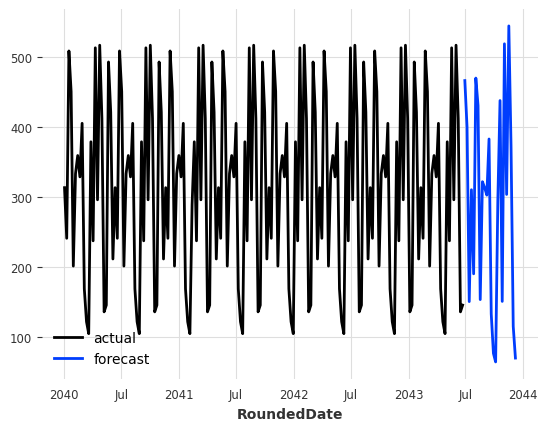

In [ ]:
loaded_model = NBEATSModel.load("./initial_models/nbeats_model")

# Get the series index for given commodity and region
def predict(region, commodity):
    for i, series in enumerate(y_all):
        if series.static_covariates['Region'].iloc[0] == region and series.static_covariates['Commodity'].iloc[0] == commodity:
            y_pred = loaded_model.predict(n=24, series=y_train_scaled[924])
            # Inverse transform the prediction
            y_pred = y_scaler.inverse_transform(y_pred)
            return y_pred
    return None
# Predict the next 24 days for the first series in y_all


# Plot the forecast
y_all[924].plot(label = 'actual')
prediction = predict("Arcadia", "Butternut Squash")
prediction.plot(label='forecast', lw=2)

# Print the Predictions for next 4 weeks
print("Week 1: ", prediction.values()[0][0])
print("Week 2: ", prediction.values()[1][0])
print("Week 3: ", prediction.values()[2][0])
print("Week 4: ", prediction.values()[3][0])

In [ ]:
# Get the RMSE for the predicted values


RMSE: nan


/Users/induwarag/DataCrunch/AgroChill/venv/lib/python3.10/site-packages/darts/metrics/metrics.py:1406: RuntimeWarning: Mean of empty slice
  return np.nanmean(
/Users/induwarag/DataCrunch/AgroChill/venv/lib/python3.10/site-packages/darts/metrics/metrics.py:374: RuntimeWarning: Mean of empty slice
  vals = component_reduction(vals, axis=COMP_AX)


In [429]:
# get the corresponding region and commodity for the predicted series
region = y_all[924].static_covariates['Region'].iloc[0]
commodity = y_all[924].static_covariates['Commodity'].iloc[0]
print(f"Predicted series for Region: {region}, Commodity: {commodity}")

Predicted series for Region: Zion, Commodity: Yam


In [393]:
# Get the series index for given commodity and region
def get_series_index(region, commodity):
    for i, series in enumerate(y_all):
        if series.static_covariates['Region'].iloc[0] == region and series.static_covariates['Commodity'].iloc[0] == commodity:
            return i
    return None
# Example usage
region = 'Arcadia'
commodity = 'Butternut Squash'
series_index = get_series_index(region, commodity)
print(f"Series index for Region: {region}, Commodity: {commodity} is {series_index}")

Series index for Region: Arcadia, Commodity: Butternut Squash is 5


In [ ]:
# Train the time series using XGBoost
